
| Nome        | nUSP           | 
| ------------- |:-------------:|
| Pedro Raul Taborga da Costa | 4537076 |
| Flavio de Figueiroa Teixeira Silva | 1127072|


## Tarefas

### 0. Baixar o dataset pelo site ou pelo comando

```kaggle datasets download mlg-ulb/creditcardfraud``` 

# 1. Fazer a leitura do conjunto de dados  escolhido usando  bibliotecas prontas ou funções das linguagens de programação Python ou R, por exemplo a biblioteca Pandas do Python.

In [1]:
import pandas as pd
dtFolder = "../../datasets/"
df = pd.read_csv(dtFolder+"creditcardfraud.zip")
cols = df.columns.tolist()
reord = [cols.pop(0),cols.pop(-2),cols.pop(-1)]
cols = reord + cols
df = df[cols]

## Pré-Rebalanceamento

<AxesSubplot:title={'center':'Tipo de Transações'}>

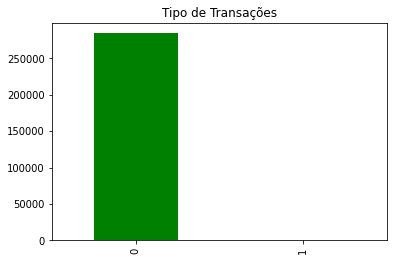

In [2]:
dfRen = df
dfRen["Class"].value_counts().plot(kind="bar", color={"green":"Legal","red":"Fraude"}, title="Tipo de Transações") #lol

## Após rebalanceamento
Dentre as técnicas de rebalanceamento:

1. under sampling -> random
1. over sampling -> random, SMOTE (synthetic minority oversampling techinique)
1. hibrida -> SMOTE -> TOMEK 

Escolhemos utilizar random oversampling, visto que a perda de dados por undesampling se mostrou grande mais

<AxesSubplot:title={'center':'Tipo de Transações'}>

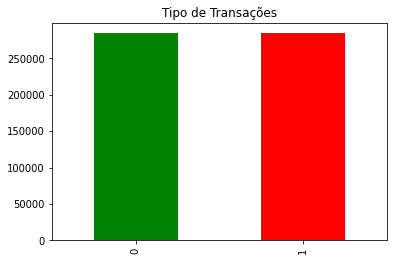

In [4]:
# Armazenando a quantidade de entradas de cada tipo de transação
count_legal, count_fraude = dfRen["Class"].value_counts()

# Separando o dataset em 2 dataframes, cada um contendo só um tipo de transação
df_legal = dfRen[dfRen["Class"] == 0].reset_index()
df_fraude = dfRen[dfRen["Class"] == 1].reset_index()

# Escolhe aleatoriamente o mesmo número que temos em fraudes dentre o total de transações legais
df_fraude_over = df_fraude.sample(count_legal, replace=True)

# Cria e exibe um dataframe a partir da junção dos 2, agora balanceados
df_balanced = pd.concat([df_legal,df_fraude_over], axis=0, ignore_index=True).drop(columns=["index"])
df_balanced["Class"].value_counts().plot(kind="bar",color={"green":"Legal","red":"Fraude"},title="Tipo de Transações")



# 4. Aplicar alguma técnica de normalização nos dados.


In [7]:
# Normalização por MinMaxScaler, onde os valores ficarão entre 0 e 1, que será útil para algoritmos de aprendizado
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df_balanced)
df_norm = pd.DataFrame(df_mm, columns=cols)
df_norm


,Time,Amount,Class,V1,V2,V3,V4,V5,V6,V7,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,0.000000,0.005824,0.0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,...,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697
1,0.000000,0.000105,0.0,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,...,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423
2,0.000006,0.014739,0.0,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,...,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911
3,0.000006,0.004807,0.0,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,...,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371
4,0.000012,0.002724,0.0,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,...,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,0.581630,0.000030,1.0,0.839623,0.821610,0.757714,0.452940,0.771432,0.260901,0.238397,...,0.455899,0.566988,0.649395,0.414110,0.661270,0.398508,0.609866,0.449292,0.422052,0.349233
568626,0.207915,0.000177,1.0,0.892096,0.814934,0.760232,0.497844,0.737971,0.251323,0.223898,...,0.760557,0.588329,0.588740,0.552950,0.663190,0.383717,0.582414,0.492779,0.428246,0.323292
568627,0.880625,0.000039,1.0,0.878901,0.811532,0.691985,0.595180,0.758050,0.241957,0.241965,...,0.647664,0.578346,0.570413,0.540637,0.672598,0.298097,0.561275,0.486672,0.367071,0.321492
568628,0.327851,0.000293,1.0,0.809437,0.796708,0.704282,0.561845,0.730503,0.259427,0.206350,...,0.784860,0.575363,0.560020,0.526293,0.666193,0.326255,0.590237,0.479357,0.415989,0.309953


<AxesSubplot:>

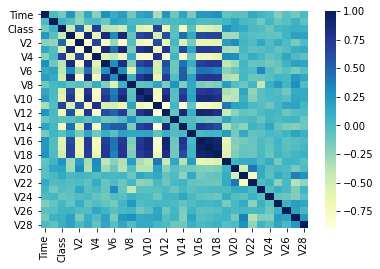

In [72]:
import seaborn as sns
corr_matrix = df_norm.corr()
sns.heatmap(corr_matrix, cmap="YlGnBu")

In [70]:
selected = corr_matrix.applymap(lambda x : x > 0.8 and x != 1)
listaVars = []
for c in selected.columns:
    for index,values in selected[c].items():
        if values == True:
            numA = c.split("V")[1]
            numB = index.split("V")[1]
            if numB > numA:
                listaVars.append([numA,numB])
listaVars #Corresponde a dupla de atributos com uma correlação maior que 0.8


[['1', '3'],
 ['1', '5'],
 ['1', '7'],
 ['3', '5'],
 ['3', '7'],
 ['5', '7'],
 ['10', '3'],
 ['10', '7'],
 ['10', '9'],
 ['10', '12'],
 ['10', '16'],
 ['10', '17'],
 ['10', '18'],
 ['12', '14'],
 ['12', '16'],
 ['12', '17'],
 ['12', '18'],
 ['16', '17'],
 ['16', '18'],
 ['17', '18']]